In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance
from scipy.sparse.csgraph import minimum_spanning_tree
import math
import pickle


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## USING PREVIOUS DATA

We want to be able to save thing 

IF Pickled = True then we will previously simulated data using the pickle packge

In [2]:
PICKLED = True 

### Simulation stage

In [3]:
from modules.dp_bounds_threaded import dp_bounds

from modules.Bhattacharyya_bounds import Bhattacharyya_bounds


In [4]:
mean_sep = np.linspace(0, 3, 15 , endpoint = True)

# mean_sep = np.linspace(.05, 3, 2 , endpoint = True)

mean_sep

array([0.        , 0.21428571, 0.42857143, 0.64285714, 0.85714286,
       1.07142857, 1.28571429, 1.5       , 1.71428571, 1.92857143,
       2.14285714, 2.35714286, 2.57142857, 2.78571429, 3.        ])

In [5]:
Bha_lst = []
dp_lst = []

if PICKLED: ## We just skip all the data creation if we are using save data. 
    print("USING PREVIOUS DATA NOT SIMULATING DATA ")
else:

    sample_size= 400
    MC_num = 400
    n0, n1 = sample_size, sample_size

    for i in mean_sep:


        print(i, end = " ")

        mean1 = [0, 0, 0 ]
        covariance1 = np.identity(3)

        mean2 = [i, 0, 0  ]

        covariance2= np.identity(3)

        mean1 = np.array(mean1)
        mean2 = np.array(mean2)
        params1  = [mean1, covariance1, n0]
        params2  = [mean2, covariance2, n1]

        Bha_class = Bhattacharyya_bounds('mv_normal', params1, params2, MC_num)
        Bha_lst.append(Bha_class)

        dp_class = dp_bounds('mv_normal', params1, params2, MC_num,handle_errors= 'worst', suppress_message=True)
        dp_lst.append(dp_class)



USING PREVIOUS DATA NOT SIMULATING DATA 


##### Pickling
This is where the data either gets save or loaded

In [6]:
file_path = 'sim_data/means_sep.pkl'


if PICKLED  == False:
    
    objects_to_save = [dp_lst, Bha_lst]


    with open(file_path, 'wb') as file:
        # Use pickle.dump to serialize and write the list of objects to the file
        pickle.dump(objects_to_save, file)
    print(f'Objects saved to {file_path}')
    

elif PICKLED == True:
    

    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load to deserialize and load the list of objects from the file
        loaded_objects = pickle.load(file)

    print('Loaded object successfully')
    
    dp_lst, Bha_lst = loaded_objects

Loaded object successfully


### Using the data

may or not be pickled. 

In [7]:
dp_l = []
dp_u = []

Bha_u =[]
Bha_l =[]
for obj in dp_lst:
    a,b = obj.get_bounds_stats()
    dp_l.append(a[2])
    dp_u.append(b[2])
    
for obj in Bha_lst:
    a,b = obj.get_bounds_stats()
    Bha_l.append(a[2])
    Bha_u.append(b[2])

    
    

In [8]:
# dp_lst[0].get_bounds()[0]

In [9]:
exact = []

for i in mean_sep:
    dx = 0.001
    x = np.arange(-5, 5 + dx, dx)

    f0 = np.exp(-0.5 * (x - 0)**2) / np.sqrt(2 * np.pi)
    f1 = np.exp(-0.5 * (x - i)**2) / np.sqrt(2 * np.pi)

    fmin = np.minimum(f0, f1)

    BER = 0.5 * np.sum(fmin * dx)
    
    exact.append(BER)

#     print("BER 2d:", BER)

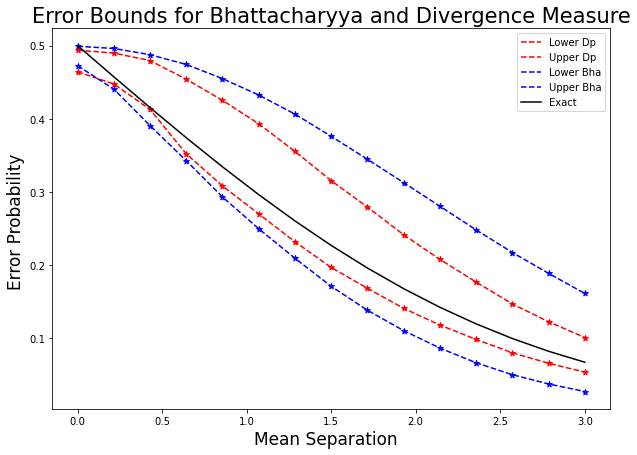

In [10]:
fs =17
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(mean_sep, dp_l, 'r--', label='Lower Dp')
ax.plot(mean_sep, dp_u, 'r--', label='Upper Dp')

ax.scatter(mean_sep, dp_l, color='r', marker='*')
ax.scatter(mean_sep, dp_u, color ='r', marker ='*' )

ax.plot(mean_sep, Bha_l, 'b--', label='Lower Bha')
ax.plot(mean_sep, Bha_u, 'b--', label='Upper Bha')

ax.plot(mean_sep, exact, 'k', label='Exact')

ax.scatter(mean_sep, Bha_u, color='b', marker='*')
ax.scatter(mean_sep, Bha_l, color ='b', marker ='*' )


ax.set_xlabel("Mean Separation  ", fontsize = fs)
ax.set_ylabel("Error Probability ", fontsize=fs)
ax.set_title("Error Bounds for Bhattacharyya and Divergence Measure", fontsize = fs +4)
ax.legend()
# plt.savefig("bounds.png",facecolor=(1,1,1,1))

plt.show()
